conda activate C:\Users\ahmad\OneDrive\Documents\Code\ztm-ml-course\06_supervised_learning_projects\01_classification\env

# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict or not they have heart disease?

## 2. Data

The original data came from the Cleveland data from the UCI Machine Learning repository:
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of the data available on Kaggle:
https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you will get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset)

**Create Data dictionary**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * -- Value 0: typical angina
    * -- Value 1: atypical angina
    * -- Value 2: non-anginal pain
    * -- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * -- Value 0: normal
    * -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * -- Value 0: upsloping
    * -- Value 1: flat
    * -- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

and the label

14. target: 0 = no disease, 1 = disease

## Preparing the tools

We're going to use Pandas, Patplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# for sklearn version 1.2+, plot_roc_curve is replaced with RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

In [2]:
np.__version__, pd.__version__, sns.__version__
# sklearn.__version__

('1.26.4', '2.1.4', '0.13.2')

## Load Data

In [3]:
df = pd.read_csv("heart-disease.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the data set.")

There are 303 rows and 14 columns in the data set.


## Data Exploration (Exploratory Data Analysis or EDA)

The goal is to find out more about the data that you are working with.

Checklist:
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types e.g numerical vs categorical?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Find out how many of each class there are
df["target"].value_counts() #  0 = no disease, 1 = disease

target
1    165
0    138
Name: count, dtype: int64

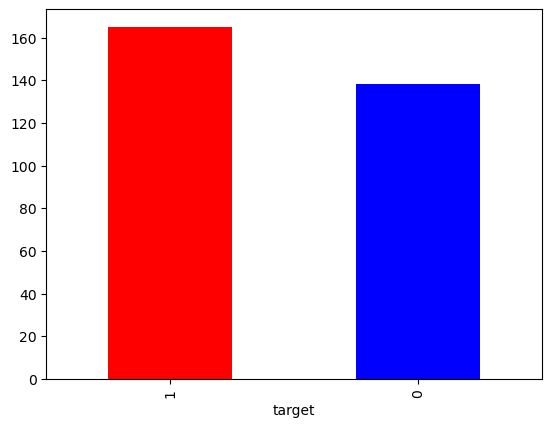

In [8]:
# Let's visualize our target with a simple plot
df.target.value_counts().plot(kind="bar", color=["red", "blue"]);

In [9]:
# Let's check the data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Let's check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Let's view and analyze our data's statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [12]:
# Let's compare different columns
df["sex"].value_counts() # (1 = male; 0 = female)

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# Compare target column with sex column using Panda's Crosstab
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


From this comparison, we can infer the below:
1. 72 out of 96 females are diagnosed with heart disease.
2. 93 out of 207 males are diagnosed with heart disease.

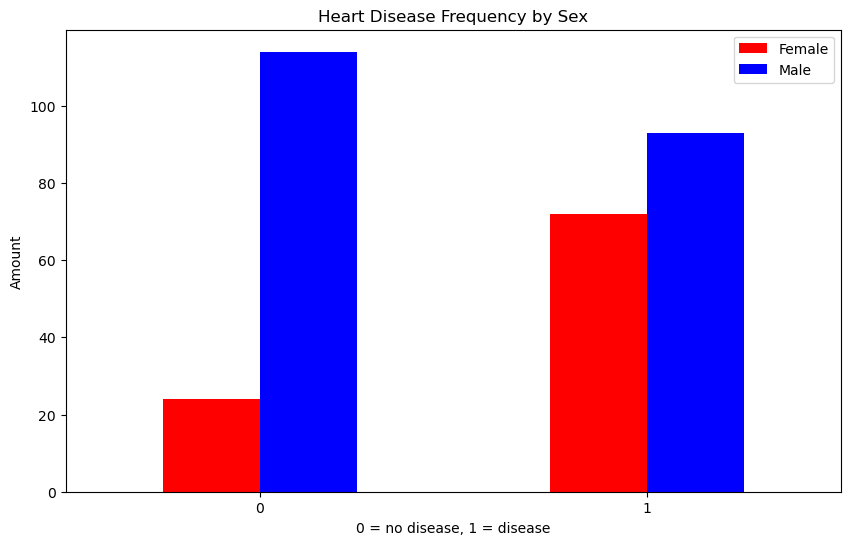

In [14]:
# Let's make it more visual
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    color=["red", "blue"],
                                   figsize=(10, 6))
plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [15]:
# Let's compare more than 1 column to the target column
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age Vs. Max Heart Rate (thalach) for Heart Disease

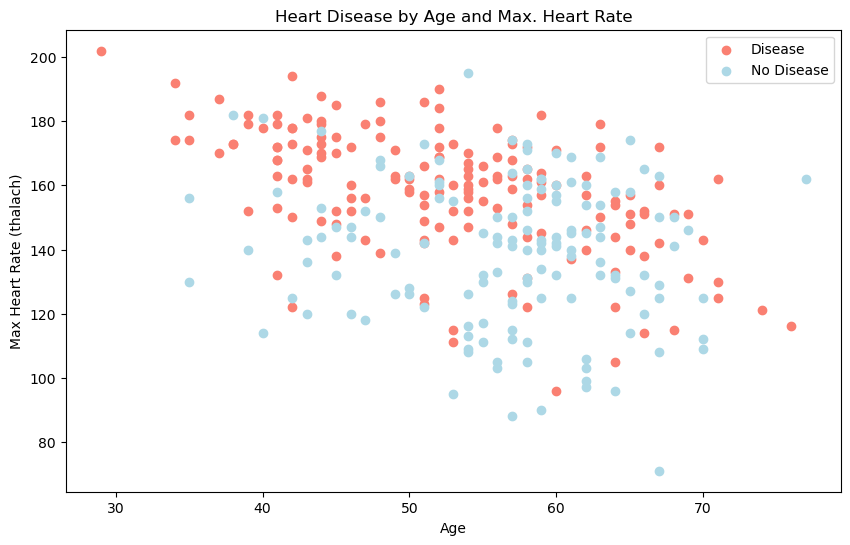

In [16]:
# Create another figure
plt.figure(figsize=(10, 6))

# Create a Scatter plot with heart disease
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon")

# Create a scatter plot with no heart disease
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="lightblue")

# Add some helpful info to the plot
plt.title("Heart Disease by Age and Max. Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.legend(["Disease", "No Disease"]);

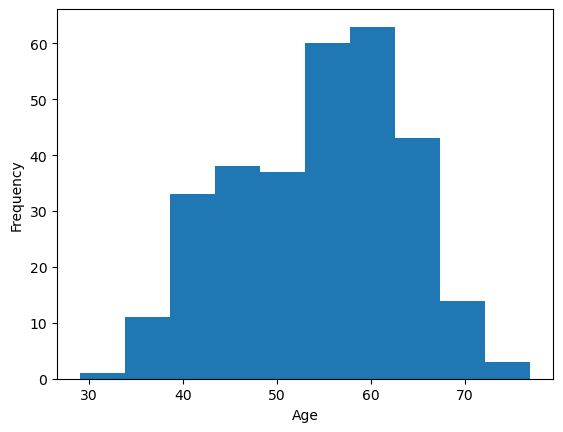

In [17]:
# Check the distribution or spread of data for the age column with a histogram
df.age.plot.hist()
plt.xlabel("Age");

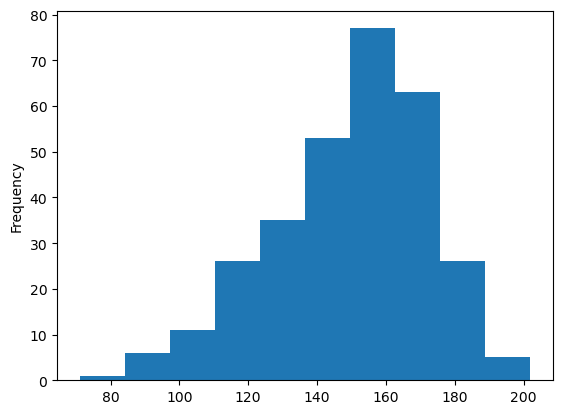

In [18]:
df.thalach.plot.hist();

### Heart Disease Frequency per Chest Pain Type

cp: chest pain type:
* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic

Typical (classic) angina chest pain consists of (1) Substernal chest pain or discomfort that is (2) Provoked by exertion or emotional stress and (3) relieved by rest or nitroglycerine (or both).

Atypical (probable) angina chest pain applies when 2 out of 3 criteria of classic angina are present.

Non-specific chest pain: If ≤ 1 of the criteria of classic angina is present, symptoms are classified as non-specific.

Typical chest pain is also called definite angina, classic angina, or typical angina.

Atypical chest pain is also called atypical/probable angina.

Non-specific chest pain is also called non-ischemic chest discomfort.

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


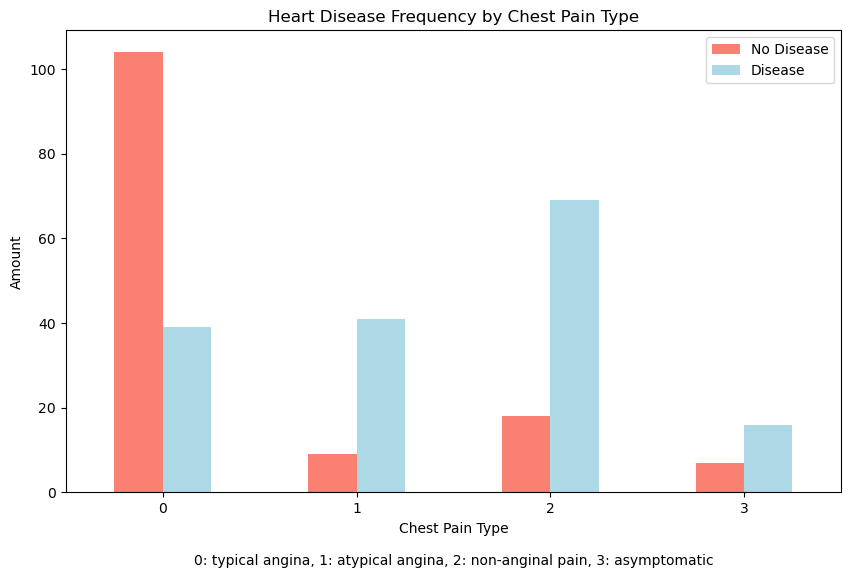

In [20]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency by Chest Pain Type")
plt.xlabel("Chest Pain Type\n\n0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


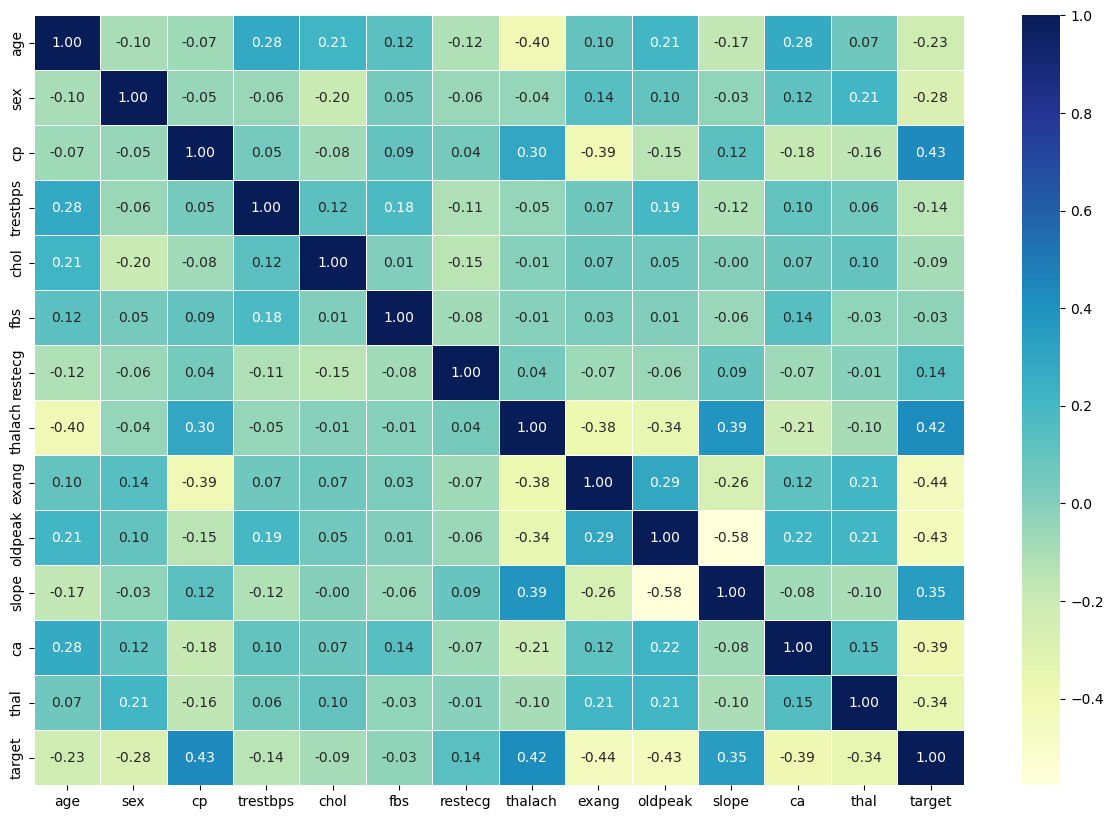

In [23]:
# Let's visualize our correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# # if need to make adjustment to the matrix
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

### Based on the observation of the correlation matrix above, we see that the variable `exang` has a negative correlation of `-0.44` with the target.
### Let's investigate!

exang: exercise induced angina (1 = yes; 0 = no)

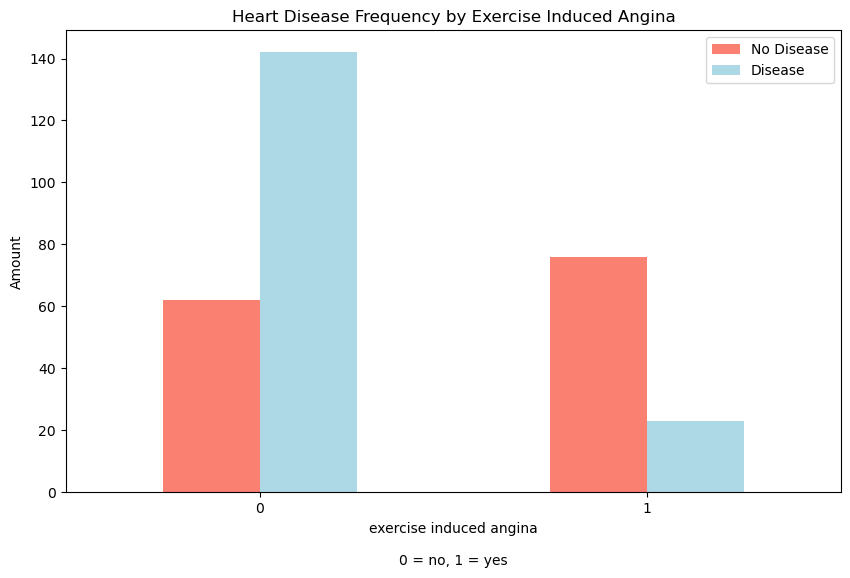

In [24]:
pd.crosstab(df.exang, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency by Exercise Induced Angina")
plt.xlabel("exercise induced angina\n\n0 = no, 1 = yes")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Let's look at the correlation between `target` and `thalach` variables which has a correlation coefficient of `0.42`.

thalach: maximum heart rate achieved

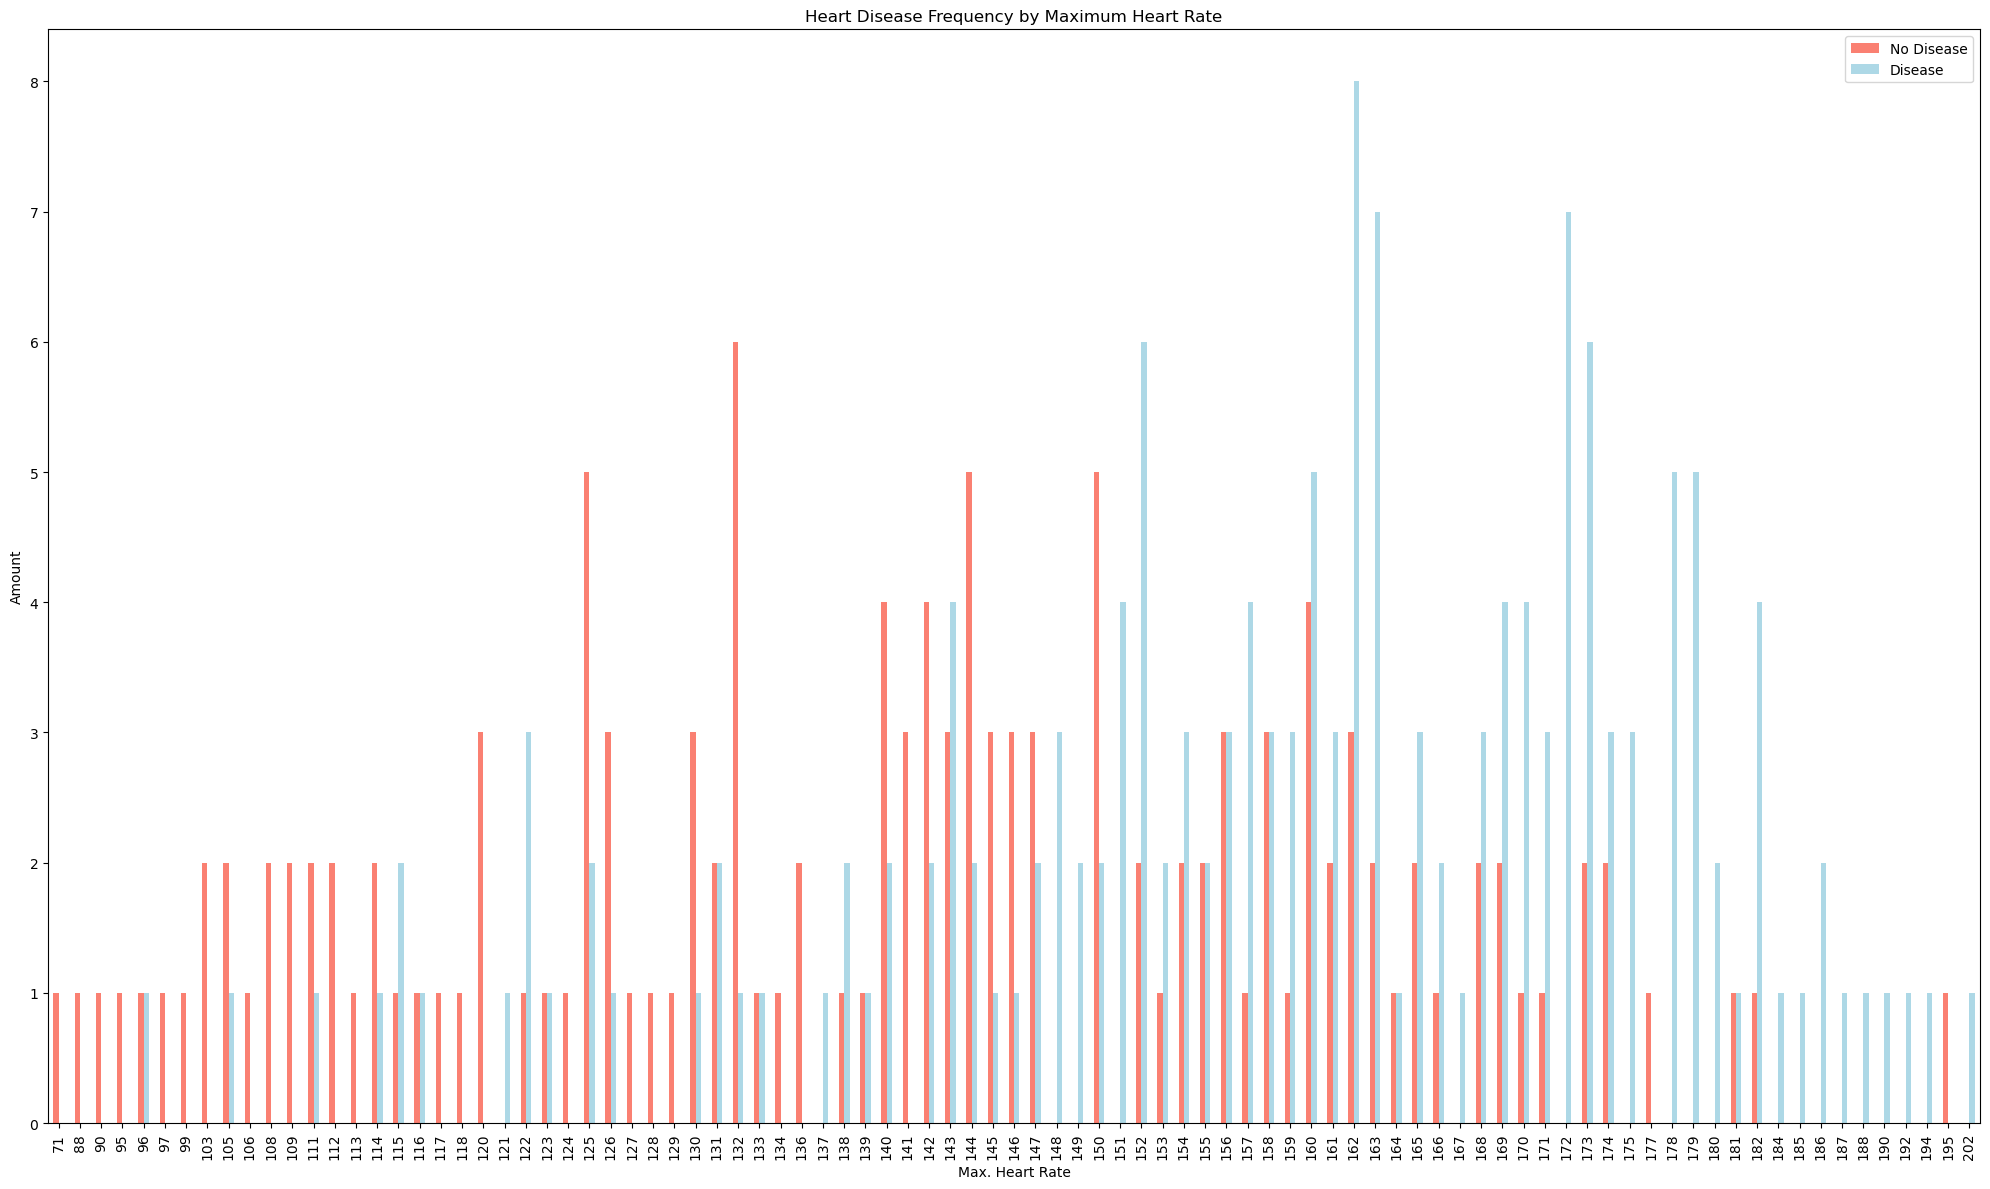

In [25]:
# create crosstab
crosstab = pd.crosstab(df.thalach, df.target)

# plot crosstab
fig, ax = plt.subplots()
crosstab.plot(kind="bar",
              ax=ax,
              figsize=(20, 12),
              color=["salmon", "lightblue"])

ax.set_xlabel("Max. Heart Rate")
ax.set_ylabel("Amount")
ax.set_title("Heart Disease Frequency by Maximum Heart Rate")
ax.legend(["No Disease", "Disease"])

# Automatically adjust figure size
fig.tight_layout()

plt.show()

## 5. Modelling

In [26]:
# Let's see our data again
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Split our dataset into X and y
X = df.drop("target", axis=1)

y = df.target

In [28]:
# Visualize X data
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
# Visualize y data
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
# Split our data into training and testing sets

np.random.seed(42)

# Split into train (80% of data) & test (20% of data) set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [31]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [32]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

It's time to build our Machine Learning model.

We'll train (finding patterns) using train data set.

Then, we'll test (use the patterns) using test data set.

We're going to try 3 different models:

1. Logistics Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

Setup a function to evaluate all 3 models.

In [33]:
# Put all models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest Clf": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    Models: A dict of different SKLearn ML models.
    X_train: Training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make an empty dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test= X_test,
                             y_train= y_train,
                             y_test= y_test)
model_scores

c:\Users\ahmad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Clf': 0.8360655737704918}

### Model Comparison

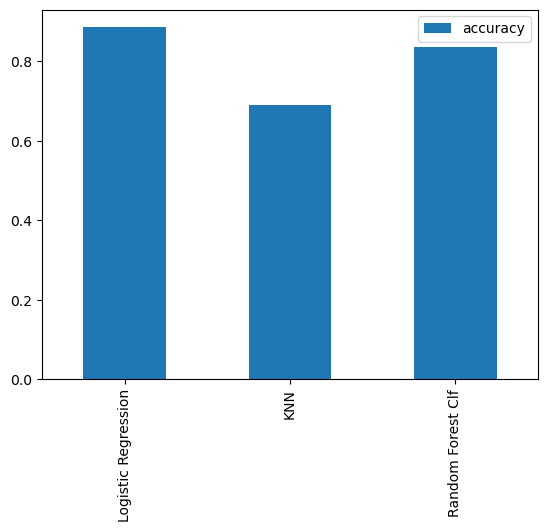

In [35]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(); # T for transpose index and columns of the data frame

The above is our baseline model and can be improved further.

Let's look at the following:
* Hyperparameter tuning
* Feature importance

(Specific to classification)
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning (by hand)

In [36]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for parameter: n_neighbors (default is 5)
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))
                        
    # Update test scores list
    test_scores.append(knn.score(X_test, y_test))

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [38]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


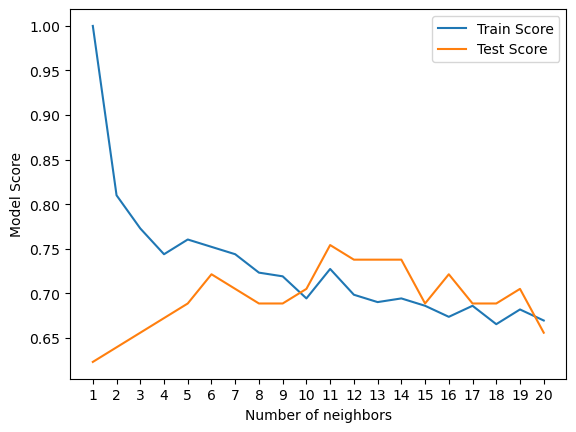

In [39]:
# Let's visualize the data
plt.plot(neighbors,
         train_scores,
         label="Train Score")

plt.plot(neighbors, 
         test_scores,
         label="Test Score")

plt.xticks(np.arange(1, 21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Even after Hyperparameter tuning, KNN is still lower than the other 2 models. Because of this, we will not use KNN model and will focus on tuning the other 2 models.

### Hyperparameter Tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegresssion()
* RandomForestClassifier()

... with RandomizedSearchCV()

In [40]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [41]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression, let's do the same for RandomForestClassifier

In [44]:
# Tune for RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [46]:
# Evaluate the RandomizedSearch RandomForestClassifier model
rs_rf_after_tuning = rs_rf.score(X_test, y_test)

In [47]:
print(f"Before tuning: {model_scores['Random Forest Clf']}")
print(f"After tuning: {rs_rf_after_tuning}")

Before tuning: 0.8360655737704918
After tuning: 0.8688524590163934


We can see that after hyperparameter tuning for RandomForestClassifier, the score is still lower than LogisticRegression model.

Let's use GridSearchCV to see if we can improve further our LogisticRegression model.

### Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model gives the best scores so far, we will try to improve with GridSearchCV

In [48]:
# Create different hyperparameters for our LogisticRegression

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparamter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
# Check for the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# Evaluate the GridSerach LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Well even after using GridSearchCV and look for the best hyperparameters tuning, we could not improve the score for LogisticRegression model.

### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [51]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [52]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [53]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

**Refresher**

What is ROC curve?
ROC stands for Receiver Operating Characteristic.

ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

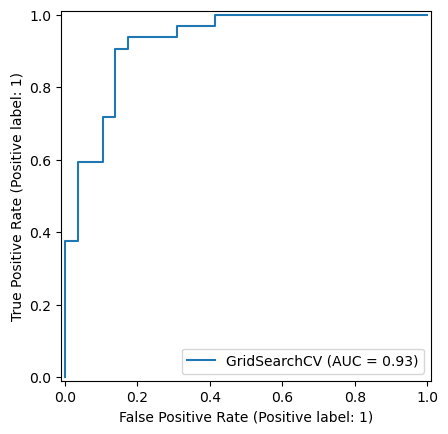

In [54]:
# Plot ROC curve and calculate AUC metric
# plot_roc_curve(gs_log_reg, X_test, y_test) # for sklearn version before 1.2+
RocCurveDisplay.from_estimator(estimator= gs_log_reg, X= X_test, y= y_test)

In [55]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


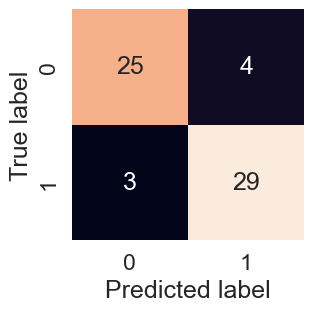

In [56]:
# Visualize it with seaborn
sns.set_theme(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

plot_conf_mat(y_test, y_preds)

True positive (tp) = y_preds = 1 & y_test = 1 --> Model predicts 1 when true is 1<br>
False positive (fp) = y_preds = 1 & y_test = 0 --> Model predicts 1 when true is 0<br>
True negative (tn) = y_preds = 0 & y_test = 0 --> Model predicts 0 when true is 0<br>
False negative (fn )= y_preds = 0 & y_test = 1 --> Model predicts 0 when true is 1<br>

In [57]:
# import sklearn
# sklearn.__version__

'1.5.1'

Now we've got a ROC curve, AUC metric and a confusion matrix.

Next, let's create a classification report, cross-validated precision, recall and F1-score.

In [59]:
# If we're creating the classification report like below, it will only give the results based on the test set
print(classification_report(y_true= y_test, y_pred= y_preds))

# Instead we need to create a cross-validated classification report, precision, recall and F1 scores

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### What is a precision score?

The precision is the ratio `tp / (tp + fp)`. The ability of the classifier not to label as positive a sample that is negative.

Precision is a metric that measures the accuracy of positive predictions made by a model.

Precision answers the question: `Out of all the positive predictions made, how many were actually correct?`


### What is a recall score?

Recall is also known as sensitivity or true positive rate (tpr). The recall is the ratio `tp / (tp + fn)`. The ability of the classifier to find all positive samples.

Recall answers the question: `Out of all the actual positives, how many were correctly predicted?`


### What is F1-score?

Also known as balanced F-score or F-measure. It is the **harmonic mean** (instead of arithmetic mean) of the precision and recall.

The formula for F1 score is:
`F1 = 2 * tp / (2 * tp + fp + fn)`

The F-score is an essential metric for evaluating the performance of machine learning models, particularly in Classification tasks.

### Calculate evaluation metrics using cross-validation

We're going to calculate the cross-validated scores using `cross_val_score()`

In [60]:
# Check for the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [61]:
# Create a new clf with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [65]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [67]:
# Find the mean cross-validated accuracy
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [71]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [72]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [73]:
# Cross-validated F1 score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

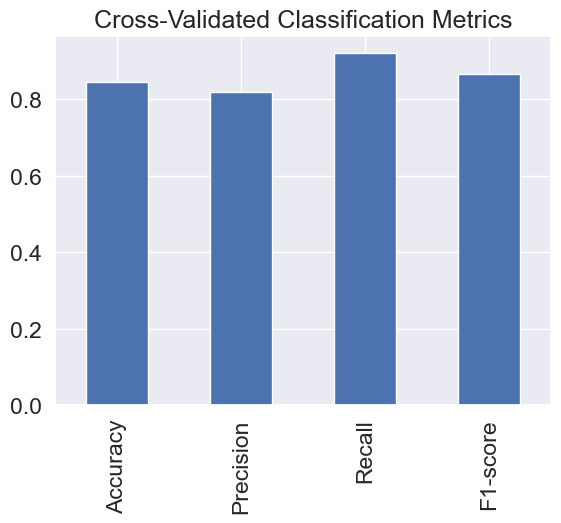

In [77]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1-score": cv_f1},
                           index=[0])

# Transpose our dataframe then plot a bar chart
cv_metrics.T.plot(kind="bar",
                  title="Cross-Validated Classification Metrics",
                  legend=False);

### Find the most important features (Feature Importance)

Which feature(or features) contributes to the success of the model predictions?

Feature importance is a step in building a good machine learning model that involves calculating the score for all input features in a model to establish the **importance of each feature** in the decision-making process.

The higher the score for a feature, the larger effect it has on the model to predict a certain variable (source: https://builtin.com/data-science/feature-importance)


### Permutation Feature Importance

The feature importance is calculated by noticing the increase or decrease in error when we permute the values of a feature. If permuting the values causes a huge change in error, it means the feature is important for our model.

It is applied by:

1. Calculating the mean squared error (mse) with the original values.
2. Shuffling the values for the features and make predictions.
3. Calculating the mean squared error with the shuffled values.
4. Comparing the difference between them.
5. Sorting the differences in descending order to get the features with most to least importance.

In [78]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [82]:
# Check coef_ array (the coefficients of the trained classifier)
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [81]:
# Match coef features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0]))) # [0] is used to get the first array of coefficients if clf.coef_ is a 2D array
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

<Axes: title={'center': 'Feature Importance'}>

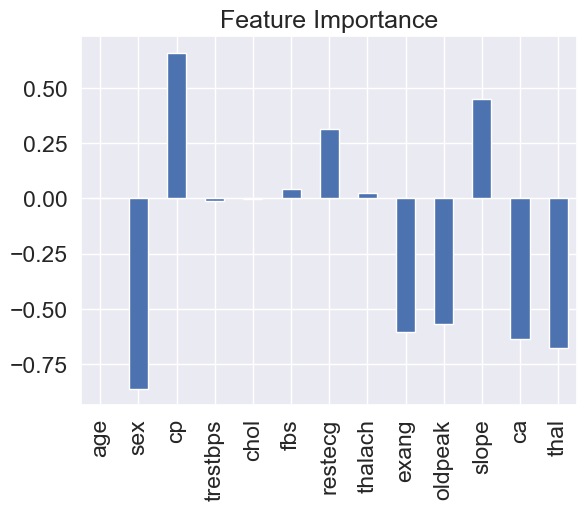

In [83]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                      legend=False)

From the feature importance chart above, we could observe some of the below:

* As the value of `sex` increases, the `target` value decreases (high negative coefficient).
* As the value of `cp` increases, the `targe` value increases (high positive coefficient).
* As the `slope` value increases, the `target` value increases (high positive coefficient).

In [85]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [107]:
print(f"For sex = 0 (female), the ratio of having heart disease is {72/24}:1")
print(f"For sex = 1 (male), the ratio of having heart disease is {114/93:.2f}:1")

For sex = 0 (female), the ratio of having heart disease is 3.0:1
For sex = 1 (male), the ratio of having heart disease is 1.23:1


We can see that for `sex` = 0, the ratio of having heart disease and no heart disease is 3:1.

For `sex` = 1, we can see that the ratio is decreasing.

We can say that the `sex` feature has a negative coefficient/correlation to the `target`.

Now, let's take a look at the `slope` feature.

slope: the slope of the peak exercise ST segment
* Value 0: upsloping
* Value 1: flat
* Value 2: downsloping

In [86]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [109]:
12/9, 91/49, 107/35

(1.3333333333333333, 1.8571428571428572, 3.057142857142857)

We can see that as the `slope` value increases, the ratio of having heart disease also increases.

We can say that `slope` has a positive coefficient/correlation to the `target`.

Let's take a look at the `cp` feature.

cp: chest pain type
* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic

In [87]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [112]:
39/104, 41/9, 69/18, 16/7

(0.375, 4.555555555555555, 3.8333333333333335, 2.2857142857142856)

## 6. Experimentation

What we have done above is actually a process of experimenting with the machine learning model.

* Have we achieved the results that was expected (evaluation metrics)? 
* Have we done enough to improve our model (hyperparameter tuning)? 
* Do we want to pursue this problem with the results that we have achieved?
* Could we collect more data?
* Do we want to use a different model like XGBoost (Boosting and Bagging)?